# Amazon Stock Prediction
24/07/2024
light version

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


### Data Preprocessing

In [2]:
df = pd.read_csv('/content/Amazon.csv.xls')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6155 non-null   object 
 1   Open       6155 non-null   float64
 2   High       6155 non-null   float64
 3   Low        6155 non-null   float64
 4   Close      6155 non-null   float64
 5   Adj Close  6155 non-null   float64
 6   Volume     6155 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB


In [3]:
df['Date'] = pd.to_datetime(df['Date'])


In [4]:
df.set_index('Date', inplace=True)


In [5]:
df.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Modeling and testing

In [6]:
X = df.drop(columns=['Close'])
y = df['Close']


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#### Random Forest Regressor

In [9]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest RMSE: 3.2340700977661565


#### Gradient Boosting Regressor

In [10]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))


Gradient Boosting RMSE: 5.350289219131076


### Hyperparameter tuning

In [11]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'subsample': [0.8, 0.9, 1.0]
# }


In [12]:
# gb_model = GradientBoostingRegressor(random_state=42)

# grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# grid_search.fit(X_train, y_train)


In [13]:
# best_params = grid_search.best_params_
# print("Best parameters: ", best_params)


In [14]:
# best_gb_model = GradientBoostingRegressor(**best_params, random_state=42)
# best_gb_model.fit(X_train, y_train)
# y_pred_best_gb = best_gb_model.predict(X_test)
# print("Tuned Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best_gb)))


### Final decision making

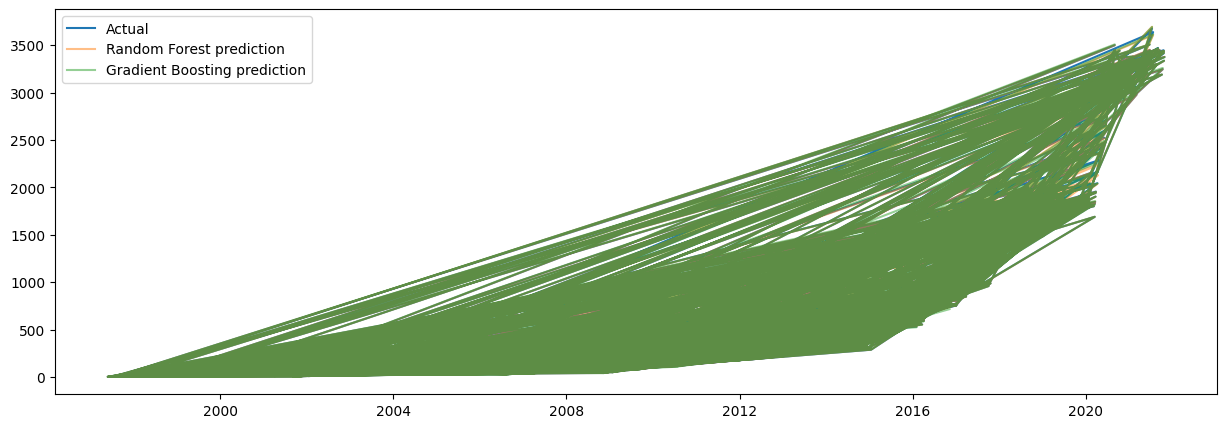

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_rf, label='Random Forest prediction', alpha=0.5)
plt.plot(y_test.index, y_pred_gb, label='Gradient Boosting prediction', alpha=0.5)
plt.legend()
plt.show()


## Conclusion:
The Random Forest model has a lower RMSE compared to the Gradient Boosting model, it means that, on average, the predictions made by the Random Forest model are closer to the actual stock prices than those made by the Gradient Boosting model.